In [68]:
import torch
import torch.nn.functional as F
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from torch.autograd import Variable

In [10]:
data = np.genfromtxt('cs-training.csv',delimiter=",",skip_header=1)
data = np.nan_to_num(data)
X=data[:,2:]
Y=data[:,1]
ros = RandomOverSampler()
X,Y=ros.fit_sample(X,Y)

In [37]:
x=torch.from_numpy(X).float()
y=torch.from_numpy(Y).float()

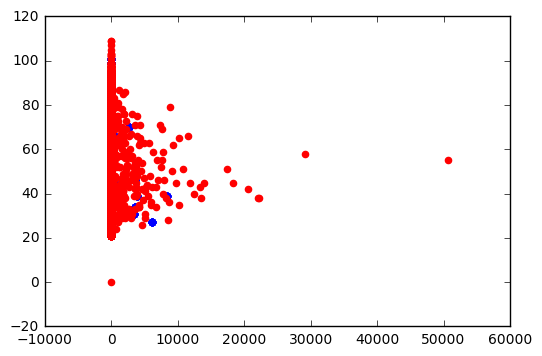

In [48]:
%matplotlib inline
plt.scatter(x[:,0][y==1],x[:,1][y==1], color='b')
plt.scatter(x[:,0][y==0],x[:,1][y==0], color='r')

In [23]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)   # hidden layer
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)   # hidden layer
        self.out = torch.nn.Linear(n_hidden2, n_output)   # output layer
        self.sig = torch.nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.hidden1(x))      # activation function for hidden layer
        x = F.relu(self.hidden2(x))      # activation function for hidden layer
        x = self.out(x)
        x = self.sig(x)
        return x

In [24]:
net = Net(n_feature=10, n_hidden1=50, n_hidden2=50, n_output=1)

In [34]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
loss_func = torch.nn.BCELoss()

In [69]:
batch_size=100
for t in range(10):
    for i in range(0,x.shape[0],batch_size):
        out = net(x[i:i+batch_size,:])
        loss = loss_func(out, y[i:i+batch_size])        
        optimizer.zero_grad()    
        loss.backward()
        optimizer.step()
    print(loss)

C:\Users\Noman\Anaconda3\lib\site-packages\torch\nn\functional.py:1474: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
C:\Users\Noman\Anaconda3\lib\site-packages\torch\nn\functional.py:1474: UserWarning: Using a target size (torch.Size([48])) that is different to the input size (torch.Size([48, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


tensor(1.00000e-12 *
       -1.0001)
tensor(1.00000e-12 *
       -1.0001)
tensor(1.00000e-12 *
       -1.0001)
tensor(1.00000e-12 *
       -1.0001)


KeyboardInterrupt: 